# Galactic Genesis Tutorial Notebook

Best practices for working with SDSS-V DR 19 Galactic Genesis data. This notebook shows you how to select Galactic Genesis data and provides a set of recommended quality flags. Below we make some plots to show how these selection impact your dataset.

Written by the Galactic Genesis Co-Chairs: Madeline Lucey, Alex Ji, Jon Bird, James Johnson, Sarah Loebman, Melissa Ness


In [ ]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.coordinates as acoo
import astropy.units as u
from matplotlib.colors import LogNorm

Semaphore is a package built for translating SDSS-V Targeting Flags. You can download it with the following line of code


In [ ]:
pip install git+https://github.com/sdss/semaphore.git@0.2.5

  Cloning https://github.com/sdss/semaphore.git (to revision 0.2.5) to /tmp/pip-req-build-nu9uonpw
  Running command git clone --filter=blob:none --quiet https://github.com/sdss/semaphore.git /tmp/pip-req-build-nu9uonpw
  Running command git checkout -q 1e25fe26cb36e67f576296b514a4a5ea6870f0ab
  Resolved https://github.com/sdss/semaphore.git to commit 1e25fe26cb36e67f576296b514a4a5ea6870f0ab
  Preparing metadata (setup.py) ... done
  Created wheel for sdss_semaphore: filename=sdss_semaphore-0.2.5-py3-none-any.whl size=38517 sha256=5e1d8a4bcc3dbfb427229373d26bfb50ae63d47edcc4384f99d0f24077faeab4
  Stored in directory: /tmp/pip-ephem-wheel-cache-qlebfz1n/wheels/22/81/56/f752248b43bd3db2df435e5ab556eebed207ac3ea6a598698a
Successfully built sdss_semaphore


In [ ]:
from sdss_semaphore.targeting import TargetingFlags

Reading in the ASPCAP APOGEE abundances. Selecting hdu=2 gives results for APOGEE data


In [ ]:
t = Table.read('/content/drive/MyDrive/astraAllStarASPCAP-0.6.0.fits.gz',hdu=2)

In [ ]:
t['J-K'] = t['j_mag']-t['k_mag']
t['abs_H'] = t['k_mag']-5*np.log10(t['r_med_photogeo']/10.)



Use the Semaphoe TargetingFlags function with the sdss5_target_flags column to easily work with the target flags

In [ ]:
flags = TargetingFlags(t['sdss5_target_flags'])

It is easy to select Galactic Genesis data with the mwm_gg program name. These stars will all have been targeted using the method described in the Galactic Genesis paper (Bird et al in prep?). However, the SDSS-V catalogs include data from SDSS-IV. In order to select data which used the Galactic Gensis targeing method, you need to select only data from SDSSV

In [ ]:
inds = (flags.in_program("mwm_gg") ) & (t['release'] =='sdss5')

In [ ]:
gg_catalog = t[inds]
print('Number of Stars in GG Catalog:'+str( len(gg_catalog)))
print('Number of Stars in SDSS-V ASPCAP Catalog:'+str( len(t)))

Number of Stars in GG Catalog:438510
Number of Stars in SDSS-V ASPCAP Catalog:1505140


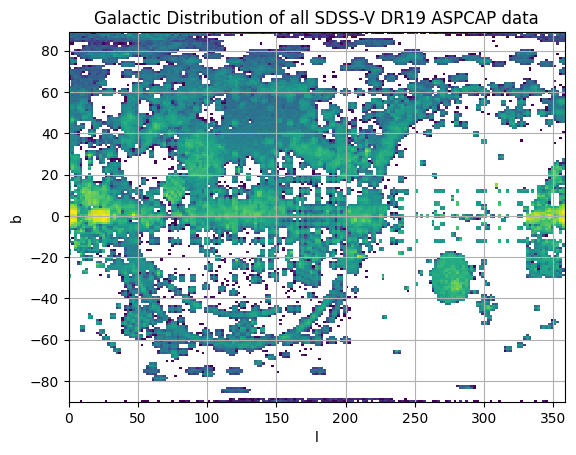

In [ ]:
xcol, ycol = "l", "b"
xbins = np.arange(0, 360, 2)
ybins = np.arange(-90, 90, 1)
bins = [xbins, ybins]
iiplot = np.isfinite(t[xcol]) & np.isfinite(t[ycol])

plt.figure()
plt.hist2d(t[xcol][iiplot], t[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title('Galactic Distribution of all SDSS-V DR19 ASPCAP data')
#plt.title(f"{iiplot.sum()} stars")
plt.grid()#

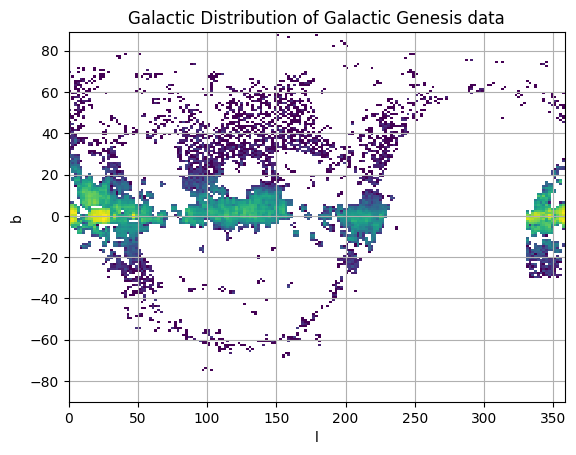

In [ ]:
xcol, ycol = "l", "b"
xbins = np.arange(0, 360, 2)
ybins = np.arange(-90, 90, 1)
bins = [xbins, ybins]
iiplot = np.isfinite(gg_catalog[xcol]) & np.isfinite(gg_catalog[ycol])

plt.figure()
plt.hist2d(gg_catalog[xcol][iiplot], gg_catalog[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title('Galactic Distribution of Galactic Genesis data')
#plt.title(f"{iiplot.sum()} stars")
plt.grid()#

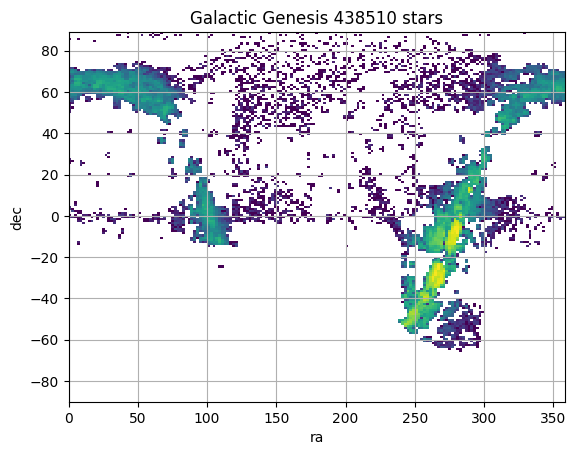

In [ ]:
xcol, ycol = "ra", "dec"
xbins = np.arange(0, 360, 2)
ybins = np.arange(-90, 90, 1)
bins = [xbins, ybins]
iiplot = np.isfinite(gg_catalog[xcol]) & np.isfinite(gg_catalog[ycol])

plt.figure()
plt.hist2d(gg_catalog[xcol][iiplot], gg_catalog[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title(f"Galactic Genesis {iiplot.sum()} stars")
plt.grid()

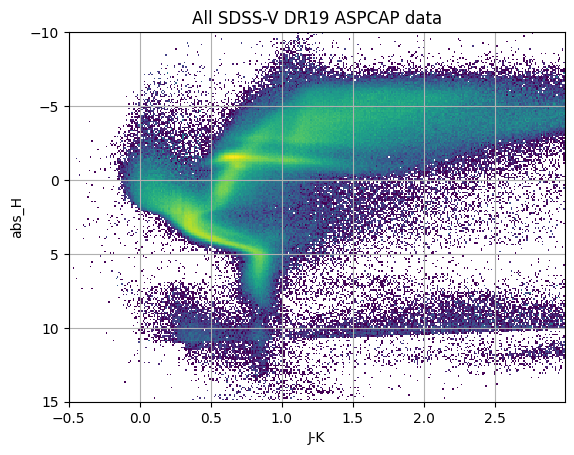

In [ ]:


xcol, ycol = "J-K", "abs_H"
xbins = np.arange(-0.5, 3, 0.01)
ybins = np.arange(-10, 15, 0.1)
bins = [xbins, ybins]
iiplot = np.isfinite(t[xcol]) & np.isfinite(t[ycol])

plt.figure()
plt.hist2d(t[xcol][iiplot], t[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("All SDSS-V DR19 ASPCAP data")
#plt.xlim(2,-1)
plt.ylim(15,-10)
plt.grid()

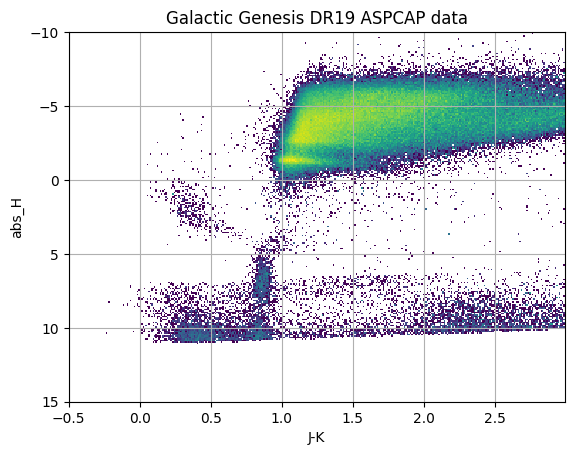

In [ ]:
xcol, ycol = "J-K", "abs_H"
xbins = np.arange(-0.5, 3, 0.01)
ybins = np.arange(-10, 15, 0.1)
bins = [xbins, ybins]
iiplot = np.isfinite(gg_catalog[xcol]) & np.isfinite(gg_catalog[ycol])

plt.figure()
plt.hist2d(gg_catalog[xcol][iiplot], gg_catalog[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("Galactic Genesis DR19 ASPCAP data")
#plt.xlim(2,-1)
plt.ylim(15,-10)
plt.grid()

The weird stuff at high abs_H is likely from bad distances

One thing to note: SDSS-IV spectra of stars also observed in SDSS-V are NOT coadded to SDSS-V spectra so they have seperate entries if observed in both


# Quality Flags

When working with SDSS-V data we recommened applying some quality flags. We have found this combination of flags to generally work well for selecting a trustworthy sample.


In [ ]:
good_gg_inds = (gg_catalog["flag_bad"] == 0) & (gg_catalog["spectrum_flags"]==0) & (gg_catalog["snr"] > 40)

In [ ]:
good_gg = gg_catalog[good_gg_inds]

print('Number of GG stars that pass quality cuts:'+str( len(good_gg)))
print('Total Number of GG stars:'+str( len(gg_catalog)))

Number of GG stars that pass quality cuts:145288
Total Number of GG stars:438510


# 3D Positions

Note that we are using Bailer-Jones photo-geometric distances.
These are not optimal at the distances that GG reaches, but good enough for this tutorial.
In DR19, there are provided distance catalogs from StarHorse and astroNN.

In [ ]:
c = SkyCoord(t['ra']*u.deg,t['dec']*u.deg,distance=t['r_med_photogeo']*u.pc)

In [ ]:
galcencoo = c.transform_to(acoo.Galactocentric)

In [ ]:
## Add some geometric columns to the table
t["x"] = galcencoo.x.to("kpc").value
t["y"] = galcencoo.y.to("kpc").value
t["z"] = galcencoo.z.to("kpc").value
t["absz"] = np.abs(t["z"])
t["R"] = np.sqrt(t["x"]**2 + t["y"]**2)

In [ ]:
good_gg = t[inds][good_gg_inds]

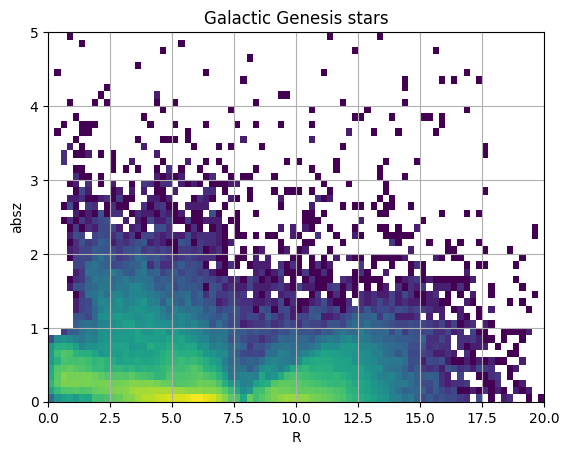

In [ ]:
xcol, ycol = "R", "absz"
xbins = np.arange(0,20.1,.25)
ybins = np.arange(0,5.1,.1)
bins = [xbins, ybins]
iiplot = np.isfinite(good_gg[xcol]) & np.isfinite(good_gg[ycol])

plt.figure()
plt.hist2d(good_gg[xcol][iiplot], good_gg[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("Galactic Genesis stars")
plt.grid()

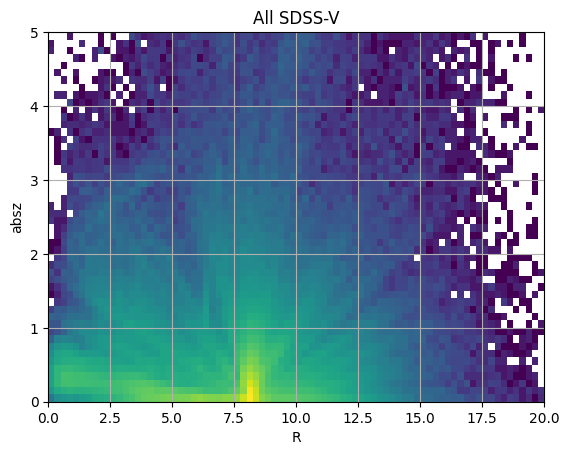

In [ ]:
xcol, ycol = "R", "absz"
xbins = np.arange(0,20.1,.25)
ybins = np.arange(0,5.1,.1)
bins = [xbins, ybins]
iiplot = np.isfinite(t[xcol]) & np.isfinite(t[ycol])

plt.figure()
plt.hist2d(t[xcol][iiplot], t[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("All SDSS-V")
plt.grid()

Showing everything in ASPCAP vs GG in ra, dec, and H to show selection function.
Observed to parent sample.

End point Plots: l vs b 2d histrogram
Kiel and/or CMD diagram
alpha vs fe
all as a function of quality and targeting flags


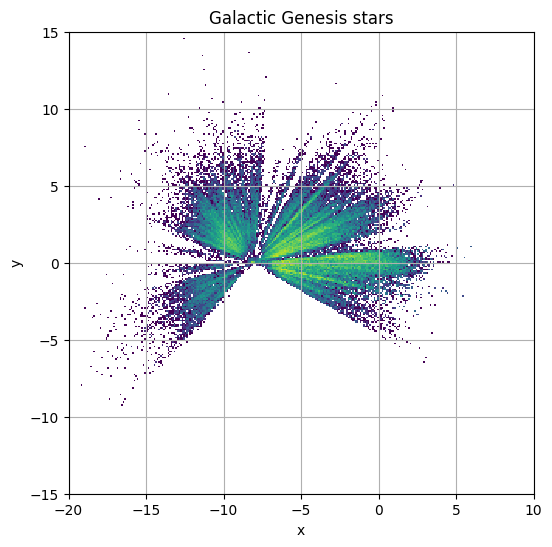

In [ ]:
## Let's do the galaxy plane
xcol, ycol = "x", "y"
xbins = np.arange(-20,10.1,.1)
ybins = np.arange(-15,15.1,.1)
bins = [xbins, ybins]
iiplot = np.isfinite(good_gg[xcol]) & np.isfinite(good_gg[ycol]) & (good_gg["absz"] < 0.5)

plt.figure(figsize=(6,6))
plt.hist2d(good_gg[xcol][iiplot], good_gg[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("Galactic Genesis stars")
plt.grid()

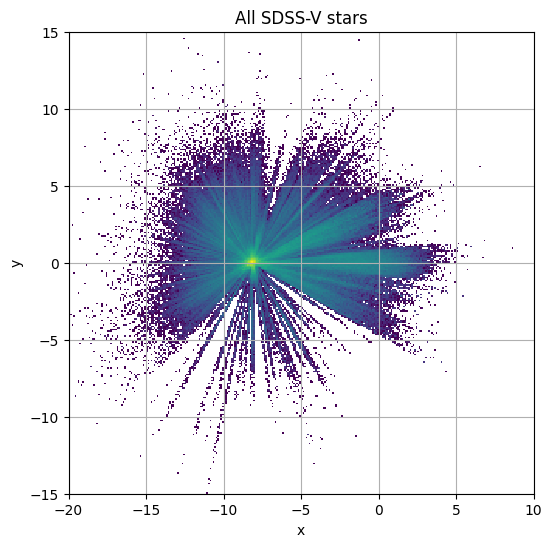

In [ ]:
## Let's do the galaxy plane
xcol, ycol = "x", "y"
xbins = np.arange(-20,10.1,.1)
ybins = np.arange(-15,15.1,.1)
bins = [xbins, ybins]
iiplot = np.isfinite(t[xcol]) & np.isfinite(t[ycol]) & (t["absz"] < 0.5)

plt.figure(figsize=(6,6))
plt.hist2d(t[xcol][iiplot], t[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("All SDSS-V stars")
plt.grid()

# ASPCAP results


(5.5, -1.0)

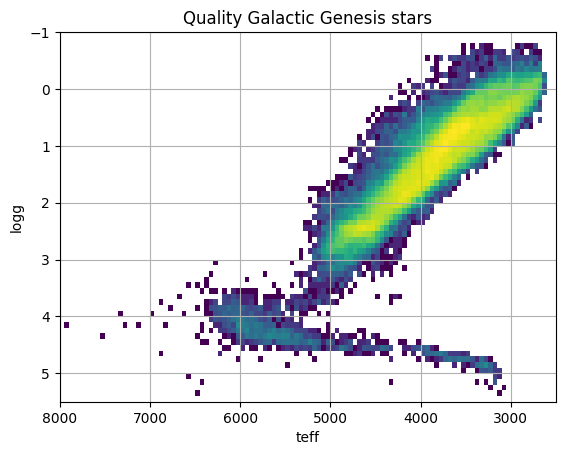

In [ ]:
xcol, ycol = "teff", "logg"
xbins = np.arange(2000, 8000, 50)
ybins = np.arange(-1, 6, 0.1)
bins = [xbins, ybins]
iiplot = np.isfinite(good_gg[xcol]) & np.isfinite(good_gg[ycol])

plt.figure()
plt.hist2d(good_gg[xcol][iiplot], good_gg[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.grid()
plt.xlim(8000, 2500)
plt.title("Quality Galactic Genesis stars")
plt.ylim(5.5, -1)

(5.5, -1.0)

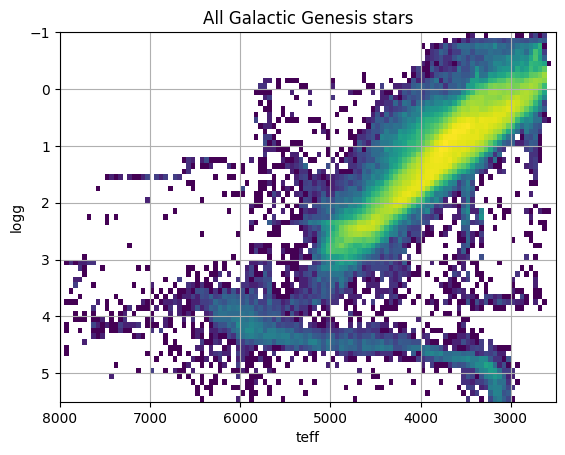

In [ ]:
xcol, ycol = "teff", "logg"
xbins = np.arange(2000, 8000, 50)
ybins = np.arange(-1, 6, 0.1)
bins = [xbins, ybins]
iiplot = np.isfinite(gg_catalog[xcol]) & np.isfinite(gg_catalog[ycol])

plt.figure()
plt.hist2d(gg_catalog[xcol][iiplot], gg_catalog[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.grid()
plt.xlim(8000, 2500)
plt.title("All Galactic Genesis stars")
plt.ylim(5.5, -1)

(5.5, -1.0)

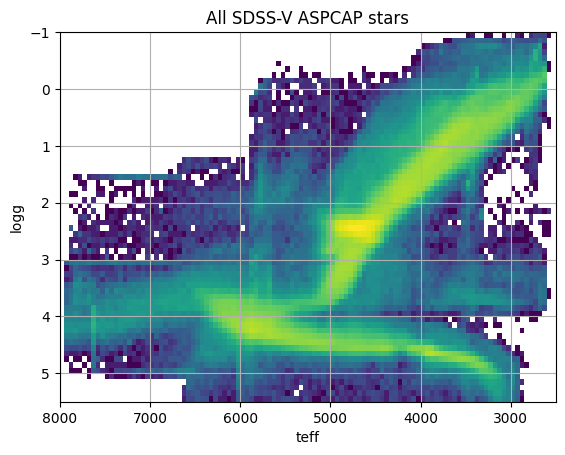

In [ ]:
xcol, ycol = "teff", "logg"
xbins = np.arange(2000, 8000, 50)
ybins = np.arange(-1, 6, 0.1)
bins = [xbins, ybins]
iiplot = np.isfinite(t[xcol]) & np.isfinite(t[ycol])

plt.figure()
plt.hist2d(t[xcol][iiplot], t[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.grid()
plt.xlim(8000, 2500)
plt.title("All SDSS-V ASPCAP stars")
plt.ylim(5.5, -1)

#Elemental Abundances

Note that we include individual element flags here!!

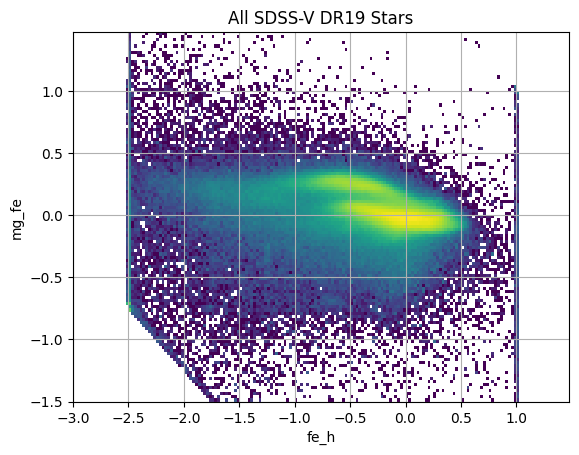

In [ ]:
t['mg_fe'] = t['mg_h']-t['fe_h']
gg_catalog['mg_fe'] = gg_catalog['mg_h'] - gg_catalog['fe_h']
good_gg['mg_fe'] = good_gg['mg_h'] - good_gg['fe_h']

elem = "mg"
xcol, ycol = "fe_h", f"{elem}_fe"
xbins = np.arange(-3, 1.5, .025)
ybins = np.arange(-1.5, 1.5, 0.025)
bins = [xbins, ybins]
iiplot = np.isfinite(t[xcol]) & np.isfinite(t[ycol])

#no element flags in this plot
iiplot = iiplot

plt.figure()
plt.hist2d(t[xcol][iiplot], t[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("All SDSS-V DR19 Stars")
plt.grid()

Weird Edge effects come from poor quality data/analysis


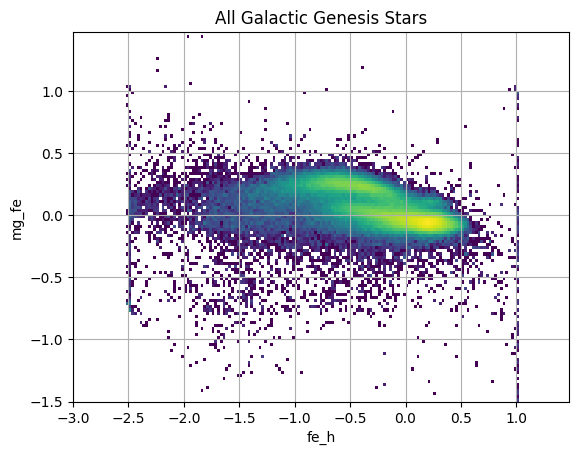

In [ ]:

xcol, ycol = "fe_h", f"{elem}_fe"
xbins = np.arange(-3, 1.5, .025)
ybins = np.arange(-1.5, 1.5, 0.025)
bins = [xbins, ybins]
iiplot = np.isfinite(gg_catalog[xcol]) & np.isfinite(gg_catalog[ycol])

#no element flags in this plot
iiplot = iiplot

plt.figure()
plt.hist2d(gg_catalog[xcol][iiplot], gg_catalog[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("All Galactic Genesis Stars")
plt.grid()

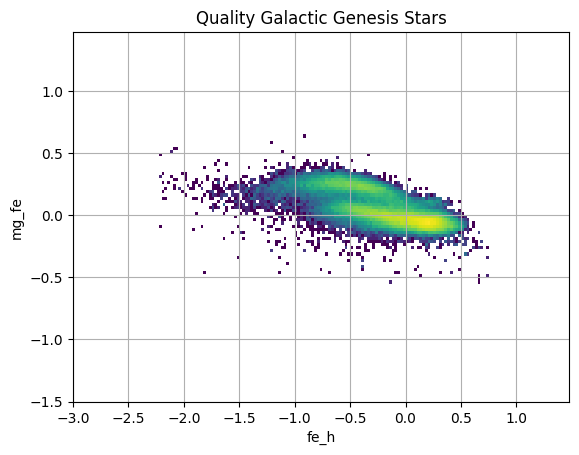

In [ ]:

xcol, ycol = "fe_h", f"{elem}_fe"
xbins = np.arange(-3, 1.5, .025)
ybins = np.arange(-1.5, 1.5, 0.025)
bins = [xbins, ybins]
iiplot = np.isfinite(good_gg[xcol]) & np.isfinite(good_gg[ycol])

# Add element flags. Sometimes these abundances are OK, but we'll do a harsh cut for now.
iiplot = iiplot & (good_gg[f"{elem}_h_flags"] == 0) & (good_gg["fe_h_flags"] == 0)

plt.figure()
plt.hist2d(good_gg[xcol][iiplot], good_gg[ycol][iiplot],
           bins=bins,
           norm=LogNorm(), cmap="viridis")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("Quality Galactic Genesis Stars")
plt.grid()